##Import y DF

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#Importamos y definimos bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
# Leo un archivo CSV y lo almaceno en un DataFrame "df".
df = pd.read_csv('/content/drive/MyDrive/Big Data/TP3/Canciones_Spotify.csv')

# Creo un nuevo DataFrame llamado "df".
df = pd.DataFrame(df)

# Selecciono solo las columnas que considero mejores para el proyecto a anlizar.
df = df[['target', 'danceability', 'liveness', 'acousticness', 'speechiness']]

# Creo un diccionario llamado "nuevos_titulos" para renombrar las columnas del DataFrame "df".
nuevos_titulos = {
    'target': 'destino',
    'danceability': 'bailabilidad',
    'liveness': 'vivo',
    'speechiness': 'hablado',
    'acousticness': 'acustico'
}

# Renombro las columnas del DataFrame "df" usando el diccionario "nuevos_titulos".
df = df.rename(columns=nuevos_titulos)

df


,destino,bailabilidad,vivo,acustico,hablado
0,1,0.833,0.1650,0.01020,0.4310
1,1,0.743,0.1370,0.19900,0.0794
2,1,0.838,0.1590,0.03440,0.2890
3,1,0.494,0.0922,0.60400,0.0261
4,1,0.678,0.4390,0.18000,0.0694
...,...,...,...,...,...
2012,0,0.584,0.1290,0.00106,0.3330
2013,0,0.894,0.0528,0.08770,0.1310
2014,0,0.637,0.2140,0.00857,0.1070
2015,0,0.557,0.0913,0.00164,0.1330


##KNN

#####KNN

In [53]:
"""
KNN es un algoritmo simple de entender e implementar.
No requiere una fase de entrenamiento costosa y no hace suposiciones sobre la distribución de los datos.
Esto lo hace especialmente útil cuando tienes datos no estructurados o no conoces la distribución subyacente de tus datos.
"""

'\nKNN es un algoritmo simple de entender e implementar.\nNo requiere una fase de entrenamiento costosa y no hace suposiciones sobre la distribución de los datos.\nEsto lo hace especialmente útil cuando tienes datos no estructurados o no conoces la distribución subyacente de tus datos.\n'

In [54]:
# Importo las bibliotecas necesarias de scikit-learn para realizar el aprendizaje automático.
from sklearn.model_selection import train_test_split  # Importo la función para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.neighbors import KNeighborsClassifier  # Importo el clasificador K-Nearest Neighbors (KNN).
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importo métricas para evaluar el modelo.

# Divido mis datos en conjuntos de entrenamiento y prueba.
X = df.drop("destino", axis=1)  # En "X" tengo todas las columnas excepto la columna "destino".
y = df["destino"]  # En "y" tengo la columna "destino".

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divido los datos en un 80% de entrenamiento y 20% de prueba.

# Ahora, entreno un modelo de clasificación KNN.
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según tus necesidades.
knn_model.fit(X_train, y_train)  # Entreno el modelo utilizando los datos de entrenamiento.

# Realizo predicciones en el conjunto de prueba.
knn_predictions = knn_model.predict(X_test)

# Evalúo el rendimiento del modelo utilizando diversas métricas.
accuracy = accuracy_score(y_test, knn_predictions)  # Calculo la exactitud del modelo.
conf_matrix = confusion_matrix(y_test, knn_predictions)  # Calculo la matriz de confusión.
classification_rep = classification_report(y_test, knn_predictions)  # Genero un informe de clasificación.

# Imprimo los resultados del rendimiento del modelo.
print("Exactitud del modelo KNN:", accuracy)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(classification_rep)



Exactitud del modelo KNN: 0.6064356435643564

Matriz de confusión:
[[123  83]
 [ 76 122]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       206
           1       0.60      0.62      0.61       198

    accuracy                           0.61       404
   macro avg       0.61      0.61      0.61       404
weighted avg       0.61      0.61      0.61       404



#####Matriz de Confusion

In [55]:
"""
La matriz de confusión proporciona una visión detallada de cómo un modelo de clasificación
está realizando predicciones en cada una de las clases
mostrando la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
"""

'\nLa matriz de confusión proporciona una visión detallada de cómo un modelo de clasificación\nestá realizando predicciones en cada una de las clases\nmostrando la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.\n'

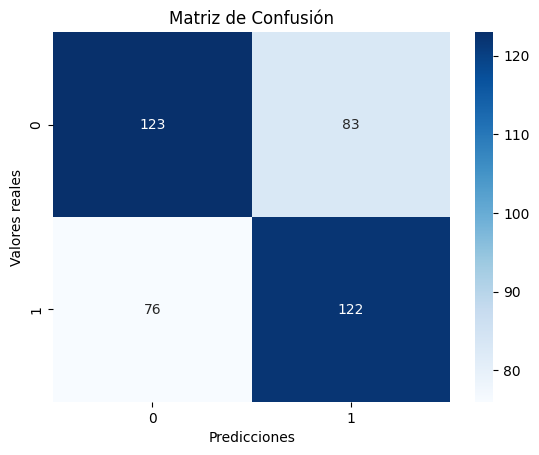

In [56]:
# Dibujo una matriz de confusión.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Etiqueto el eje x e y ademas de poner titulo
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')

# Muestro la matriz de confusión.
plt.show()


#####Curva Roc

In [57]:
"""
La curva ROC es especialmente útil cuando se trabaja con problemas de clasificación binaria,
donde se debe distinguir entre dos clases (por ejemplo, positiva y negativa)
La curva ROC muestra cómo cambia el equilibrio entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos
a medida que se ajusta el umbral de decisión del modelo
"""

'\nLa curva ROC es especialmente útil cuando se trabaja con problemas de clasificación binaria,\ndonde se debe distinguir entre dos clases (por ejemplo, positiva y negativa)\nLa curva ROC muestra cómo cambia el equilibrio entre la tasa de verdaderos positivos (Sensibilidad) y la tasa de falsos positivos\na medida que se ajusta el umbral de decisión del modelo\n'

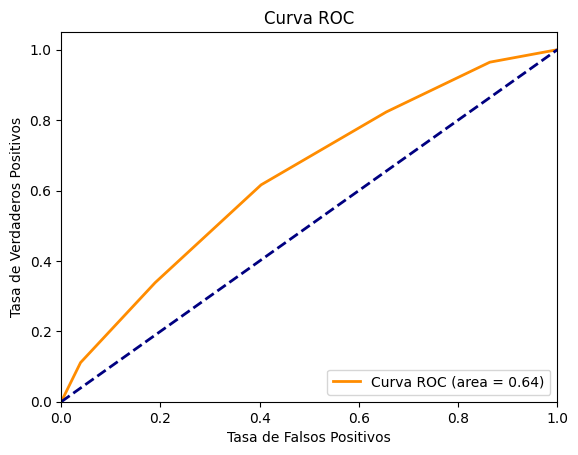

In [58]:


# Importo las funciones necesarias de scikit-learn para calcular la curva ROC.
from sklearn.metrics import roc_curve, roc_auc_score

# Calculo las probabilidades de la clase positiva (1) en lugar de las etiquetas de clase.
y_scores = knn_model.predict_proba(X_test)[:, 1]

# Calculo la curva ROC utilizando las tasas de falsos positivos (fpr), tasas de verdaderos positivos (tpr) y umbrales.
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculo el área bajo la curva ROC (AUC) para evaluar el rendimiento del modelo.
roc_auc = roc_auc_score(y_test, y_scores)

# Creo una figura para mostrar la curva ROC.
plt.figure()

# Dibujo la curva ROC en el gráfico con etiquetas y colores personalizados.
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)

# Dibujo una línea de referencia diagonal punteada que representa un clasificador aleatorio.
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Personalizo los ejes y agrego un título al gráfico.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

# Muestro la leyenda en la esquina inferior derecha del gráfico.
plt.legend(loc="lower right")

# Muestro la curva ROC en pantalla.
plt.show()

#####Precision Re-Call

In [59]:
"""
El gráfico de Precisión-Recall se centra en la tasa de verdaderos positivos (Recall) y la precisión,
lo que es especialmente relevante en aplicaciones donde identificar correctamente la clase positiva
es más importante que evitar falsos positivos.
El gráfico de Precisión-Recall permite ajustar el umbral de decisión del modelo de manera más específica
para satisfacer los requisitos de la aplicación. Puedes seleccionar un umbral que maximice
la precisión o el recall según tus necesidades.
"""

'\nEl gráfico de Precisión-Recall se centra en la tasa de verdaderos positivos (Recall) y la precisión,\nlo que es especialmente relevante en aplicaciones donde identificar correctamente la clase positiva\nes más importante que evitar falsos positivos.\nEl gráfico de Precisión-Recall permite ajustar el umbral de decisión del modelo de manera más específica\npara satisfacer los requisitos de la aplicación. Puedes seleccionar un umbral que maximice\nla precisión o el recall según tus necesidades.\n'

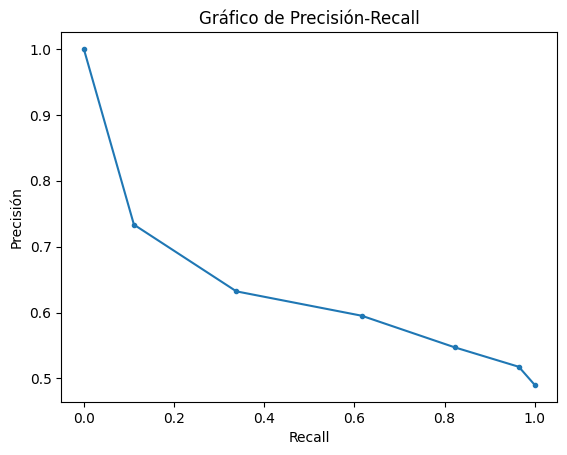

In [60]:

# Importo la función necesaria de scikit-learn para calcular la curva precisión-recall.
from sklearn.metrics import precision_recall_curve

# Calculo la curva precisión-recall utilizando las puntuaciones del modelo.
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Tras calcular la curva, la grafico representando la precisión en función del recall.
plt.plot(recall, precision, marker='.')

# Etiqueto el eje x como "Recall" (tasa de verdaderos positivos).
plt.xlabel('Recall')

# Etiqueto el eje y como "Precisión".
plt.ylabel('Precisión')

# Agrego un título al gráfico.
plt.title('Gráfico de Precisión-Recall')

# Muestro el gráfico en pantalla.
plt.show()



#####F1-Score

In [61]:
"""
La visualización del F1-score permite identificar el umbral de decisión
que maximiza el equilibrio entre precisión y recall,
lo que es especialmente útil cuando se necesita ajustar
el rendimiento del modelo según los requisitos específicos de la aplicación.
"""

'\nLa visualización del F1-score permite identificar el umbral de decisión\nque maximiza el equilibrio entre precisión y recall,\nlo que es especialmente útil cuando se necesita ajustar\nel rendimiento del modelo según los requisitos específicos de la aplicación.\n'

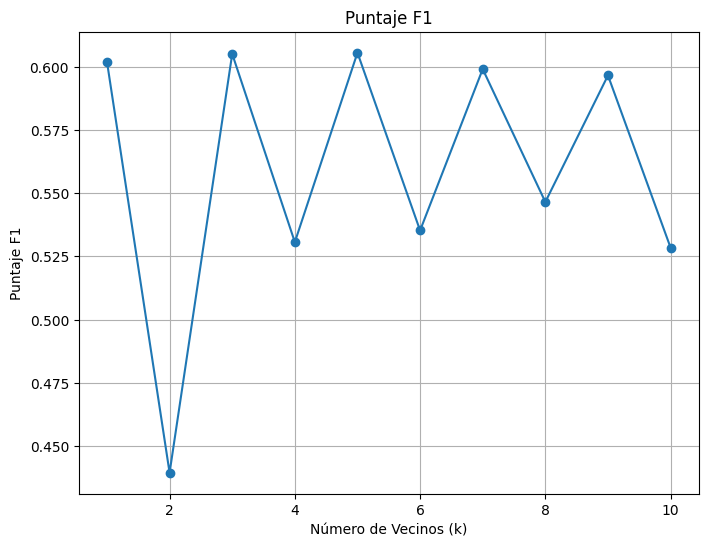

In [62]:
# Importo la función f1_score de scikit-learn, que será utilizada para calcular el puntaje F1.
from sklearn.metrics import f1_score

# Creo una lista para almacenar los puntajes F1 para diferentes valores de k.
k_values = range(1, 11)
f1_scores = []

# Evalúo el puntaje F1 para diferentes valores de k utilizando un bucle.
for k in k_values:
    # Creo un modelo KNN con el número de vecinos igual a "k".
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Entreno el modelo con los datos de entrenamiento.
    knn_model.fit(X_train, y_train)

    # Realizo predicciones en el conjunto de prueba.
    knn_predictions = knn_model.predict(X_test)

    # Calculo el puntaje F1 y lo almaceno en la lista "f1_scores".
    f1 = f1_score(y_test, knn_predictions)
    f1_scores.append(f1)

# Grafico el puntaje F1 en función de k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Puntaje F1')
plt.title('Puntaje F1')
plt.grid()
plt.show()


In [63]:
# Importo las funciones necesarias de scikit-learn para realizar la Validación Cruzada k-fold.
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Divido los datos en características (X) y etiquetas (y).
X = df.drop("destino", axis=1)  # En "X", tengo todas las columnas excepto la columna "destino".
y = df["destino"]  # En "y", tengo la columna "destino".

# Creo un modelo KNN con un número específico de vecinos (en este caso, 5, pero puedes ajustarlo según sea necesario).
knn_model = KNeighborsClassifier(n_neighbors=5)

# Realizo la Validación Cruzada k-fold con k = 5 pliegues.
scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# Imprimo los resultados de la Validación Cruzada.
print("Exactitud de cada pliegue:", scores)  # Muestra la exactitud de cada pliegue.
print("Exactitud promedio:", scores.mean())  # Muestra la exactitud promedio de todos los pliegues.


Exactitud de cada pliegue: [0.56188119 0.53960396 0.58560794 0.60794045 0.56575682]
Exactitud promedio: 0.5721580718865932


##SVM

#####SVM

In [47]:
"""
SVM es efectivo en espacios de alta dimensión,
lo que significa que puede manejar conjuntos de datos con muchas características (variables) de manera eficiente.
Esto lo hace útil en aplicaciones como el procesamiento de imágenes, el procesamiento de texto y la bioinformática.
"""

'\nSVM es efectivo en espacios de alta dimensión,\nlo que significa que puede manejar conjuntos de datos con muchas características (variables) de manera eficiente.\nEsto lo hace útil en aplicaciones como el procesamiento de imágenes, el procesamiento de texto y la bioinformática.\n'

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.drop("destino", axis=1)  # X contiene todas las columnas excepto la columna "destino"
y = df["destino"]  # y contiene la columna "destino"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo SVM
svm_model = SVC(kernel='linear', C=1.0)  # Puedes ajustar el tipo de kernel y el parámetro C según sea necesario
svm_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
svm_predictions = svm_model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, svm_predictions)
conf_matrix = confusion_matrix(y_test, svm_predictions)
classification_rep = classification_report(y_test, svm_predictions)

print("Exactitud del modelo SVM:", accuracy)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(classification_rep)


Exactitud del modelo SVM: 0.5891089108910891

Matriz de confusión:
[[103 103]
 [ 63 135]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       206
           1       0.57      0.68      0.62       198

    accuracy                           0.59       404
   macro avg       0.59      0.59      0.59       404
weighted avg       0.59      0.59      0.59       404



#####Matriz de Confusion

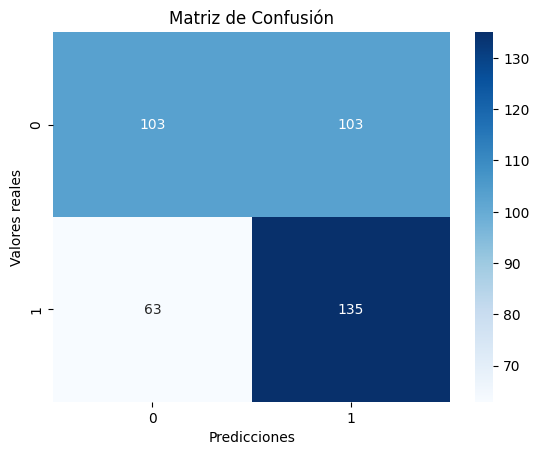

In [49]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


#####Curva Roc

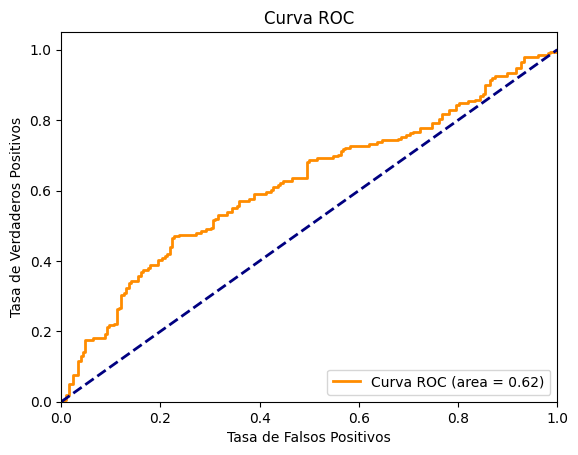

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = svm_model.decision_function(X_test)  # Valores de decisión en lugar de probabilidades
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


#####Precision Re-Call

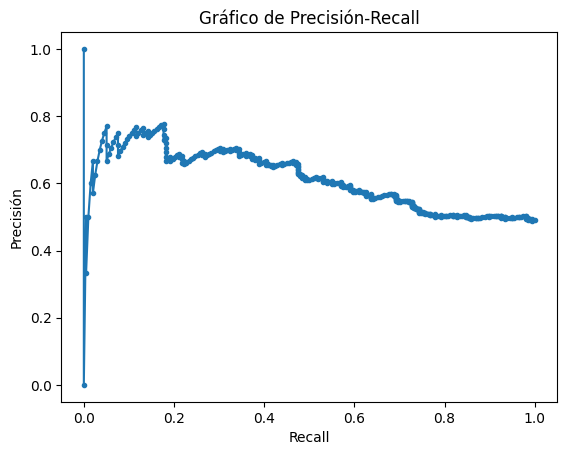

In [51]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Gráfico de Precisión-Recall')
plt.show()


In [52]:
#Validación Cruzada k-fold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Divide los datos en características (X) y etiquetas (y)
X = df.drop("destino", axis=1)
y = df["destino"]

# Crea el modelo SVM
svm_model = SVC(kernel='linear', C=1.0)  # Modelo SVM de clasificación lineal (ajusta los parámetros según sea necesario)

# Realiza Validación Cruzada k-fold (k = 5) y evalúa la precisión
scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

# Imprime los resultados
print("Exactitud de cada pliegue:", scores)
print("Exactitud promedio:", scores.mean())

Exactitud de cada pliegue: [0.47772277 0.58910891 0.5955335  0.55334988 0.54342432]
Exactitud promedio: 0.5518278750952017


##Arbol de Decision

#####Arbol de decision

In [40]:
"""
Los árboles de decisión son altamente interpretables.
Las decisiones se presentan en una estructura jerárquica de "si-entonces", que es fácil de entender y explicar.
Esto es crucial en aplicaciones donde se necesita comprender y justificar las decisiones del modelo.
"""

'\nLos árboles de decisión son altamente interpretables.\nLas decisiones se presentan en una estructura jerárquica de "si-entonces", que es fácil de entender y explicar.\nEsto es crucial en aplicaciones donde se necesita comprender y justificar las decisiones del modelo.\n'

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree


# Divide los datos en conjuntos de entrenamiento y prueba
X = df.drop("destino", axis=1)  # X contiene todas las columnas excepto la columna "destino"
y = df["destino"]  # y contiene la columna "destino"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=5)  # Puedes ajustar la profundidad máxima
tree_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
tree_predictions = tree_model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, tree_predictions)
conf_matrix = confusion_matrix(y_test, tree_predictions)
classification_rep = classification_report(y_test, tree_predictions)

print("Exactitud del modelo de árbol de decisión:", accuracy)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(classification_rep)


Exactitud del modelo de árbol de decisión: 0.6039603960396039

Matriz de confusión:
[[172  34]
 [126  72]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.83      0.68       206
           1       0.68      0.36      0.47       198

    accuracy                           0.60       404
   macro avg       0.63      0.60      0.58       404
weighted avg       0.63      0.60      0.58       404



In [42]:
"""#Validacion Cruzada K-fold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Divide los datos en características (X) y etiquetas (y)
X = df.drop("destino", axis=1)
y = df["destino"]

# Crea el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None)  # Modelo de Árbol de Decisión (ajusta los parámetros según sea necesario)

# Realiza Validación Cruzada k-fold (k = 5) y evalúa la precisión
scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')

# Imprime los resultados
print("Exactitud de cada pliegue:", scores)
print("Exactitud promedio:", scores.mean())"""


'#Validacion Cruzada K-fold\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Divide los datos en características (X) y etiquetas (y)\nX = df.drop("destino", axis=1)\ny = df["destino"]\n\n# Crea el modelo de Árbol de Decisión\ntree_model = DecisionTreeClassifier(criterion=\'gini\', max_depth=None)  # Modelo de Árbol de Decisión (ajusta los parámetros según sea necesario)\n\n# Realiza Validación Cruzada k-fold (k = 5) y evalúa la precisión\nscores = cross_val_score(tree_model, X, y, cv=5, scoring=\'accuracy\')\n\n# Imprime los resultados\nprint("Exactitud de cada pliegue:", scores)\nprint("Exactitud promedio:", scores.mean())'

#####Matriz de Confusion

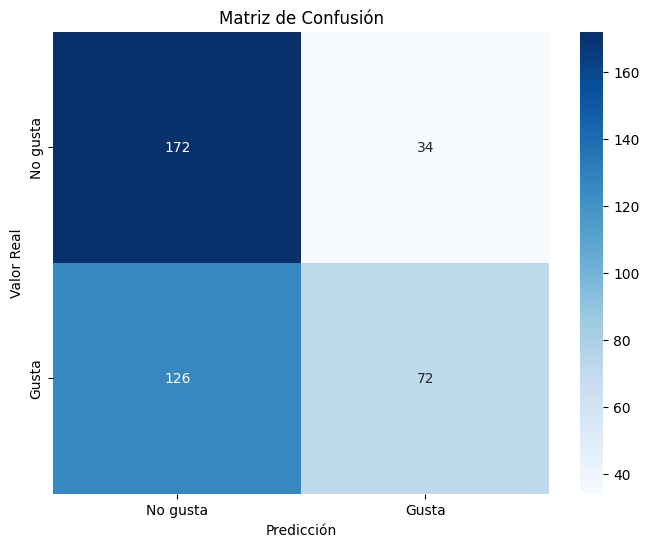

In [43]:
from sklearn.metrics import confusion_matrix

# Realiza predicciones en el conjunto de prueba (asegúrate de que el modelo ya esté entrenado)
tree_predictions = tree_model.predict(X_test)

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, tree_predictions)

# Crea un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["No gusta", "Gusta"], yticklabels=["No gusta", "Gusta"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


#####Curva Roc

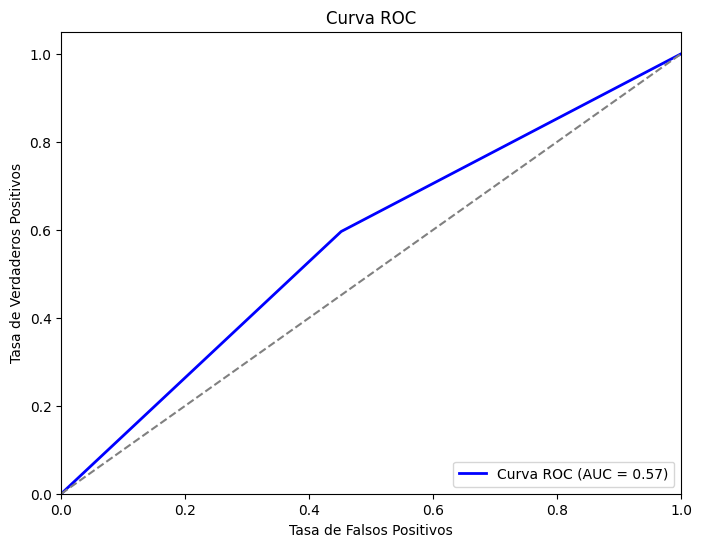

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Divide los datos en características (X) y etiquetas (y)
X = df.drop("destino", axis=1)
y = df["destino"]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None)  # Ajusta los parámetros según sea necesario

# Entrena el modelo
tree_model.fit(X_train, y_train)

# Obtiene las probabilidades de predicción para la clase positiva (clase "Gusta")
y_prob = tree_model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#####Precision Re-Call

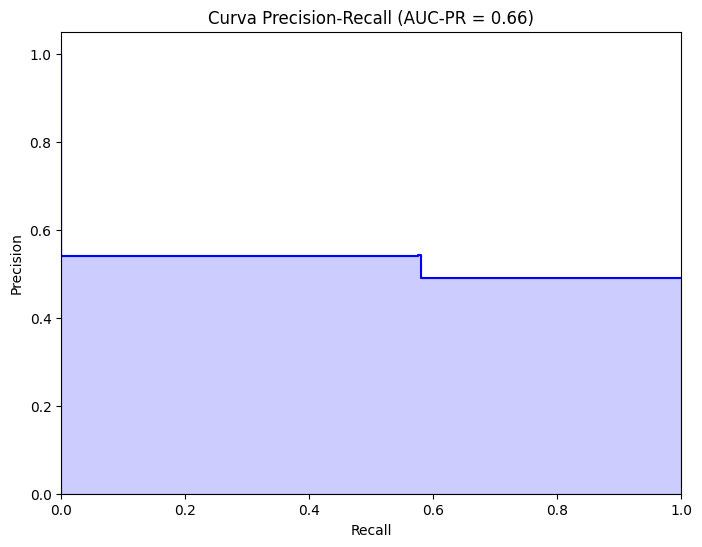

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Divide los datos en características (X) y etiquetas (y)
X = df.drop("destino", axis=1)
y = df["destino"]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None)  # Ajusta los parámetros según sea necesario

# Entrena el modelo
tree_model.fit(X_train, y_train)

# Obtiene las probabilidades de predicción para la clase positiva (clase "Gusta")
y_prob = tree_model.predict_proba(X_test)[:, 1]

# Calcula la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calcula el área bajo la curva Precision-Recall (AUC-PR)
pr_auc = auc(recall, precision)

# Grafica la curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Curva Precision-Recall (AUC-PR = {pr_auc:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


#####F1-Score

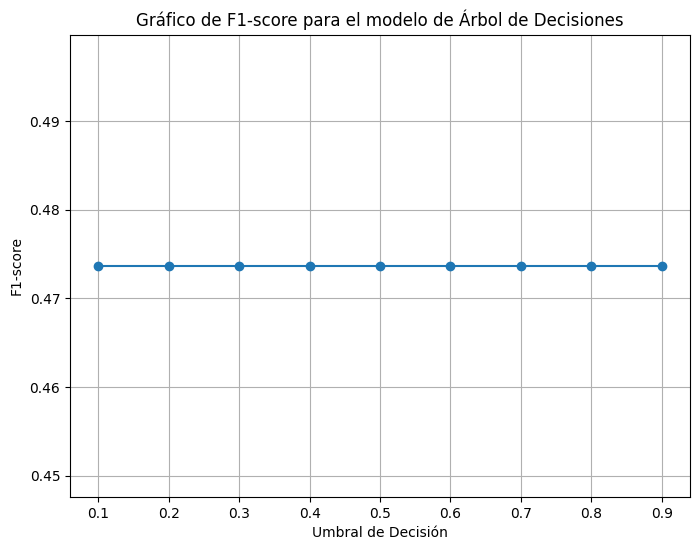

In [46]:
from sklearn.metrics import f1_score

# Calcula el F1-score en función de diferentes umbrales
thresholds = np.linspace(0.1, 0.9, 9)  # Define una serie de umbrales de decisión
f1_scores = []

for threshold in thresholds:
    binary_predictions = (tree_predictions >= threshold).astype(int)
    f1 = f1_score(y_test, binary_predictions)
    f1_scores.append(f1)

# Grafica el F1-score en función de los umbrales
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.title('Gráfico de F1-score para el modelo de Árbol de Decisiones')
plt.xlabel('Umbral de Decisión')
plt.ylabel('F1-score')
plt.grid()
plt.show()


##Naive Bayes

#####Naive Bayes

In [34]:
"""
El algoritmo Naive Bayes es fácil de entender y de implementar.
Su simplicidad lo hace adecuado para tareas de clasificación,
especialmente cuando se dispone de datos con características categóricas o discretas.
"""

'\nEl algoritmo Naive Bayes es fácil de entender y de implementar.\nSu simplicidad lo hace adecuado para tareas de clasificación,\nespecialmente cuando se dispone de datos con características categóricas o discretas.\n'

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.drop("destino", axis=1)  # X contiene todas las columnas excepto la columna "destino"
y = df["destino"]  # y contiene la columna "destino"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
nb_predictions = nb_model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, nb_predictions)
conf_matrix = confusion_matrix(y_test, nb_predictions)
classification_rep = classification_report(y_test, nb_predictions)

print("Exactitud del modelo Naive Bayes Gaussiano:", accuracy)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nInforme de clasificación:")
print(classification_rep)


Exactitud del modelo Naive Bayes Gaussiano: 0.5767326732673267

Matriz de confusión:
[[120  86]
 [ 85 113]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       206
           1       0.57      0.57      0.57       198

    accuracy                           0.58       404
   macro avg       0.58      0.58      0.58       404
weighted avg       0.58      0.58      0.58       404



#####Matriz de Confusion

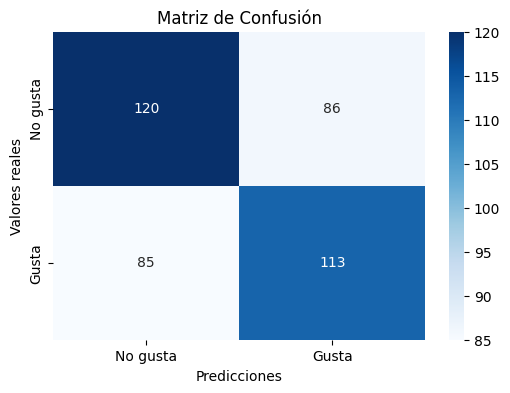

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.drop("destino", axis=1)  # X contiene todas las columnas excepto la columna "destino"
y = df["destino"]  # y contiene la columna "destino"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
nb_predictions = nb_model.predict(X_test)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Visualiza la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No gusta", "Gusta"], yticklabels=["No gusta", "Gusta"])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión")
plt.show()


#####Precision Re-Call

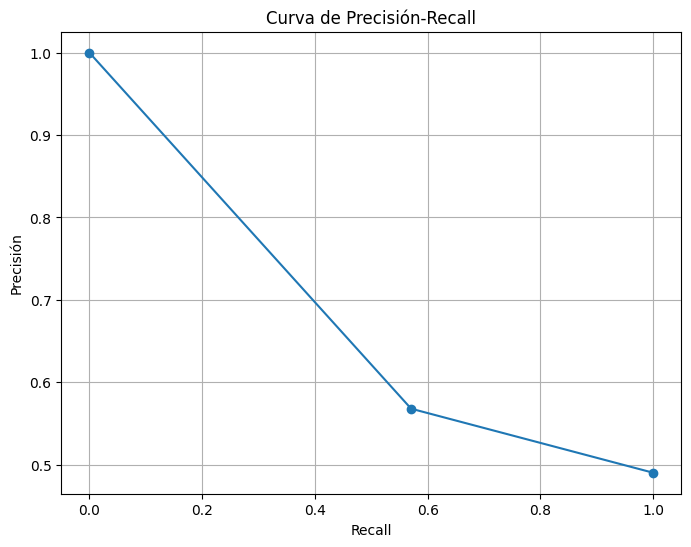

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcula la precisión, el recall y el F1-score con las predicciones binarias
precision = precision_score(y_test, nb_predictions)
recall = recall_score(y_test, nb_predictions)
f1 = f1_score(y_test, nb_predictions)

precision, recall, thresholds = precision_recall_curve(y_test, nb_predictions)

# Grafica la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.title('Curva de Precisión-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.grid()
plt.show()

#####Histograma

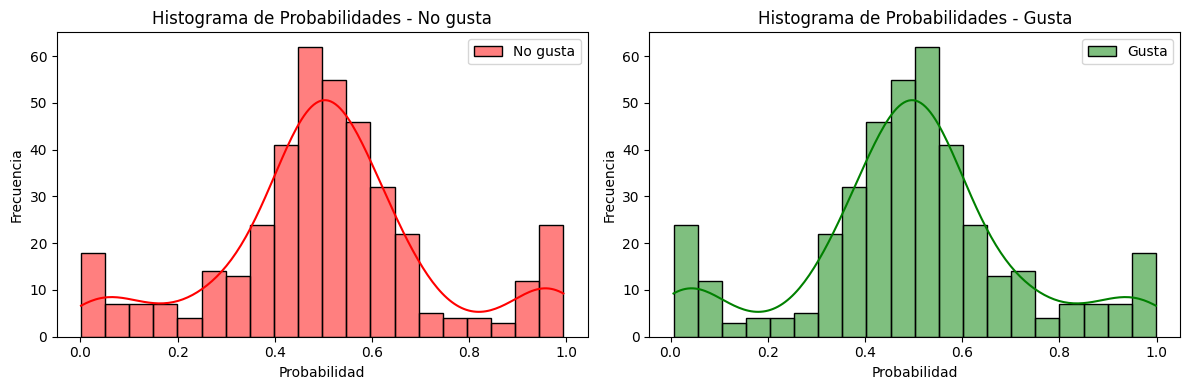

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Divide los datos en conjuntos de entrenamiento y prueba
X = df.drop("destino", axis=1)
y = df["destino"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena el modelo Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calcula las probabilidades de las clases en el conjunto de prueba
probabilities = nb_model.predict_proba(X_test)

# Crea histogramas de probabilidad para las clases
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(probabilities[:, 0], kde=True, color='r', label="No gusta")
plt.title("Histograma de Probabilidades - No gusta")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(probabilities[:, 1], kde=True, color='g', label="Gusta")
plt.title("Histograma de Probabilidades - Gusta")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcula la precisión, el recall y el F1-score con las predicciones binarias
precision = precision_score(y_test, nb_predictions)
recall = recall_score(y_test, nb_predictions)
f1 = f1_score(y_test, nb_predictions)

# Imprime las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión: 0.5678391959798995
Recall: 0.5707070707070707
F1-score: 0.5692695214105794
